In [2]:
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Problem_C_Data_Wordle1.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Percent in,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),expectation,index
1,12/31/2022,560,manly,20380,1899,0,2,17,37,29,12,2,4.34,1
2,12/30/2022,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,2
3,12/29/2022,558,havoc,20001,1919,0,2,16,38,30,12,2,4.4,3
4,12/28/2022,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,4


In [27]:
#create word list
words=[]
for i in range(1,360):
    words.append(str(df.iloc[i,2]))

#create the expectation list
expectation=[]
for i in range(1,360):
    expectation.append(float(df.iloc[i,12]))

In [99]:
#create a list of index

#create a dictionary of the letters and their frequent positions
dic={'a':[1,2,3,4],'b':[1],'c':[1],'d':[2,3,4,5],
'e':[2,3,4,5],'f':[0],'g':[2],'h':[2,5],'i':[3,4],
'j':[],'k':[4,2],'l':[4,5],'m':[1],'n':[2,3,4],'o':[3],
'p':[1],'q':[2],'r':[3,4,5],'s':[1,4],'t':[1,4,5],
'u':[3],'v':[],'w':[],'x':[],'y':[5],'z':[]}

lst_letter_index=[]
for i in range(359):
    index=0
    for j in range(len(words[i])):
        if words[i][j] in dic.keys():
            #print(words[i][j],dic[words[i][j]])
            if j+1 in dic[words[i][j]]:
                index+=1
    lst_letter_index.append(index)

lst_letter_index_power=[]
for i in range(359):
    lst_letter_index_power.append(2**lst_letter_index[i])
#print(lst_letter_index_power)
#print(lst_letter_index)

lst_letter_index_sqrt=[]
for i in range(359):
    lst_letter_index_sqrt.append(np.exp(lst_letter_index[i]))




In [100]:
#calculate the corelation index
import statistics as st
covariance_matrix=np.cov(expectation,lst_letter_index)
covariance=covariance_matrix[0][1]
print(covariance)

stdev_expectation=st.stdev(expectation)
stdev_letter_index=st.stdev(lst_letter_index)

corelation_index=covariance/(stdev_expectation*stdev_letter_index)
print(corelation_index)

covariance1=np.cov(expectation,lst_letter_index_power)
stdev_letter_index_power=st.stdev(lst_letter_index_power)

corelation_index2=covariance1/(stdev_expectation*stdev_letter_index_power)
print('corelation_index2 is',corelation_index2)

covariance_matrix=np.cov(expectation,lst_letter_index_sqrt)
covariance2=covariance_matrix[0][1]

stdev_letter_index_sqrt=st.stdev(lst_letter_index_sqrt)

corelation_index3=covariance2/(stdev_expectation*stdev_letter_index_sqrt)
print('corelation_index3 is',corelation_index3)


-0.10636155677627179
-0.24062559284207655
corelation_index2 is [[ 0.04879525 -0.21331369]
 [-0.21331369 20.49379684]]
corelation_index3 is -0.19185952168338258


Text(0, 0.5, 'Expectation')

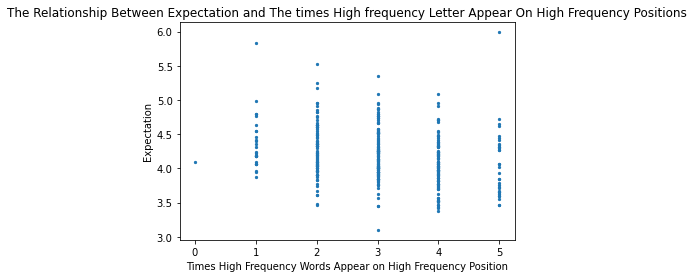

In [49]:
#plot the graph of index and expectation
plt.figure()
plt.title('The Relationship Between Expectation and The times High frequency Letter Appear On High Frequency Positions')
plt.scatter(lst_letter_index,expectation,s=5)
plt.xlabel('Times High Frequency Words Appear on High Frequency Position')
plt.ylabel('Expectation')


In [50]:
#calculate the averages
lst_1=[]
lst_2=[]
lst_3=[]
lst_4=[]
lst_5=[]
for i in range(359):
    if lst_letter_index[i]==1:
        lst_1.append(expectation[i])
    elif lst_letter_index[i]==2:
        lst_2.append(expectation[i])
    elif lst_letter_index[i]==3:
        lst_3.append(expectation[i])
    elif lst_letter_index[i]==4:
        lst_4.append(expectation[i])
    elif lst_letter_index[i]==5:
        lst_5.append(expectation[i])
average1=sum(lst_1)/len(lst_1)
average2=sum(lst_2)/len(lst_2)
average3=sum(lst_3)/len(lst_3)
average4=sum(lst_4)/len(lst_4)
average5=sum(lst_5)/len(lst_5)
print(average1,average2,average3,average4,average5)

    

4.380740740740741 4.2817241379310325 4.2252136752136735 4.056382978723405 4.076363636363637


In [51]:
#we change the standard to a word appear for more than 30 times
dic2={'a':[2,3,4],'b':[],'c':[1],'d':[],'e':[3,4,5],'f':[],
'g':[2],'h':[],'i':[3],'j':[],'k':[2],'l':[],'m':[],
'n':[2],'o':[3],'p':[],'q':[2],'r':[5],'s':[1],'t':[1,5],
'u':[],'v':[],'w':[],'x':[],'y':[5],'z':[]}
lst_letter_index2=[]
for i in range(359):
    index=0
    for j in range(len(words[i])):
        if words[i][j] in dic2.keys():
            #print(words[i][j],dic[words[i][j]])
            if j+1 in dic2[words[i][j]]:
                index+=1
    lst_letter_index2.append(index)
print(lst_letter_index2)


[2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 3, 4, 2, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 0, 3, 2, 1, 1, 3, 2, 1, 1, 1, 4, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 2, 3, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 3, 2, 2, 2, 0, 2, 1, 1, 2, 2, 4, 1, 2, 3, 2, 2, 3, 1, 2, 0, 2, 1, 1, 3, 2, 2, 3, 1, 3, 1, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 4, 1, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 3, 2, 3, 0, 1, 3, 1, 3, 0, 0, 2, 1, 0, 1, 2, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1, 2, 1, 3, 2, 2, 0, 3, 1, 1, 0, 1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 0, 0, 1, 2, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 2, 0, 3, 3, 1, 2, 2, 2, 3, 3, 0, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 2, 1, 2, 2, 2, 3, 4, 1, 3, 2, 0, 0, 2, 1, 3, 1, 2, 3, 1, 0, 3, 1, 4, 3, 3, 0, 3, 1, 2, 0, 4, 1, 2, 2, 2, 0, 2, 2, 3, 3, 2, 0, 2, 3, 2, 2, 3, 2, 1, 3, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 

In [52]:
#again calculate the corelation index
covariance_matrix=np.cov(expectation,lst_letter_index2)
covariance=covariance_matrix[0][1]
print(covariance)

stdev_expectation=st.stdev(expectation)
stdev_letter_index2=st.stdev(lst_letter_index2)

corelation_index=covariance/(stdev_expectation*stdev_letter_index2)
print(corelation_index)

-0.055335351146107305
-0.1420558658926251
